# Linear Discriminant Analysis - Demonstration
## Without dimensionality reduction

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, load_wine, load_digits
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from LinearDiscriminantAnalysis import LinearDiscriminantAnalysis

# Configuration:
np.set_printoptions(precision=4, suppress=True)
warnings.filterwarnings("ignore", category=UserWarning)

iris = load_iris(as_frame=True)
iris.frame['target'] = iris.target

breast_cancer = load_breast_cancer(as_frame=True)
breast_cancer.frame['target'] = breast_cancer.target

wine = load_wine(as_frame=True)
wine.frame['target'] = wine.target

digits = load_digits(as_frame=True)
digits.frame['target'] = digits.target

def print_digits(X, y, title=None):
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(X.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
        ax.text(0, 7, str(y[i]))
    
    fig.suptitle(title, y=1.08, fontsize=22)

In [2]:
X = digits.data.to_numpy()
y = digits.target.to_numpy()

X.shape, y.shape

((1797, 64), (1797,))

## PCA Transformation
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying PCA.

In [3]:
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X)

X_pca.shape

(1797, 64)

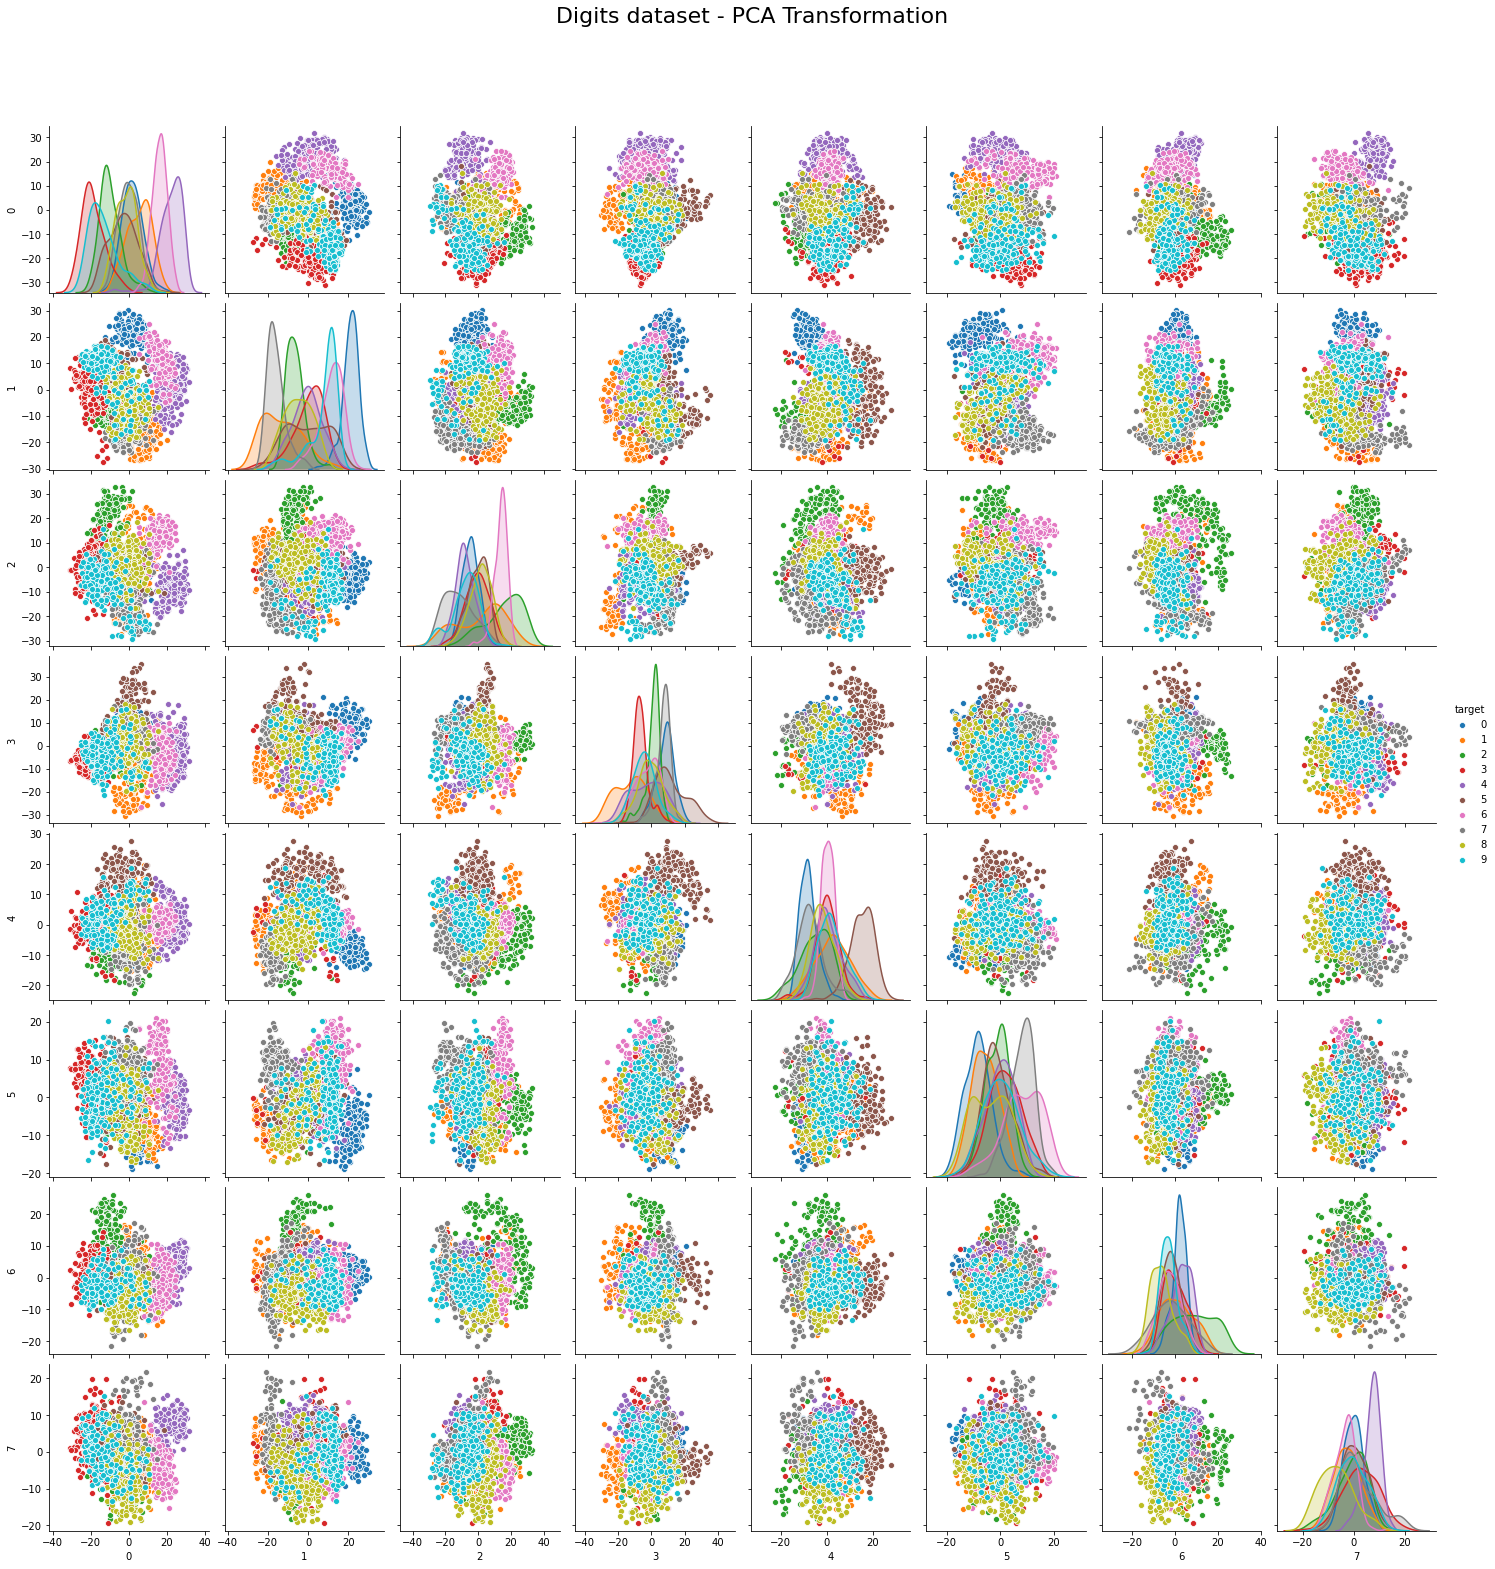

In [4]:
digits_pca = pd.DataFrame.from_records(X_pca[:, :8])
digits_pca['target'] = y
g = sns.pairplot(digits_pca, hue="target")
g.fig.suptitle(f"Digits dataset - PCA Transformation", y=1.08, fontsize=22);

In [5]:
X_pca_inv = pca.inverse_transform(X_pca)

X_pca_inv.shape

(1797, 64)

## LDA Transformation
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying LDA.

In [6]:
lda = LinearDiscriminantAnalysis(random_state=42)
X_lda = lda.fit_transform(X, y, verbose=True)

X_lda.shape

Targets were provided: using the labeled data.

Mu:
[[ 0.      0.3038  5.2048 11.8358 11.8481  5.7819  1.3623  0.1297  0.0056
   1.9939 10.3823 11.9794 10.2794  8.1758  1.8464  0.108   0.0028  2.6016
   9.9032  6.9928  7.0979  7.8063  1.7885  0.0501  0.0011  2.4697  9.0913
   8.8214  9.9271  7.5515  2.3178  0.0022  0.      2.3395  7.6672  9.0718
  10.3016  8.744   2.9093  0.      0.0089  1.5838  6.8815  7.2282  7.6722
   8.2365  3.4563  0.0273  0.0072  0.7045  7.507   9.5392  9.4162  8.7585
   3.7251  0.2065  0.0006  0.2794  5.5576 12.089  11.8091  6.7641  2.0679
   0.3645]]

Mu_c[0]:
[ 0.      0.0225  4.1854 13.0955 11.2978  2.927   0.0337  0.      0.
  0.8876 12.5787 13.3708 11.4944 11.3764  0.9663  0.      0.      3.7303
 14.2753  5.264   2.1011 12.1685  3.5225  0.      0.      5.2921 12.7135
  1.9944  0.1404  9.0618  6.4494  0.      0.      5.8708 11.5562  0.8933
  0.0449  8.7753  7.1236  0.      0.      3.4944 13.2865  1.6517  1.5337
 11.309   5.8539  0.      0.      0.7978 13.056

(1797, 64)

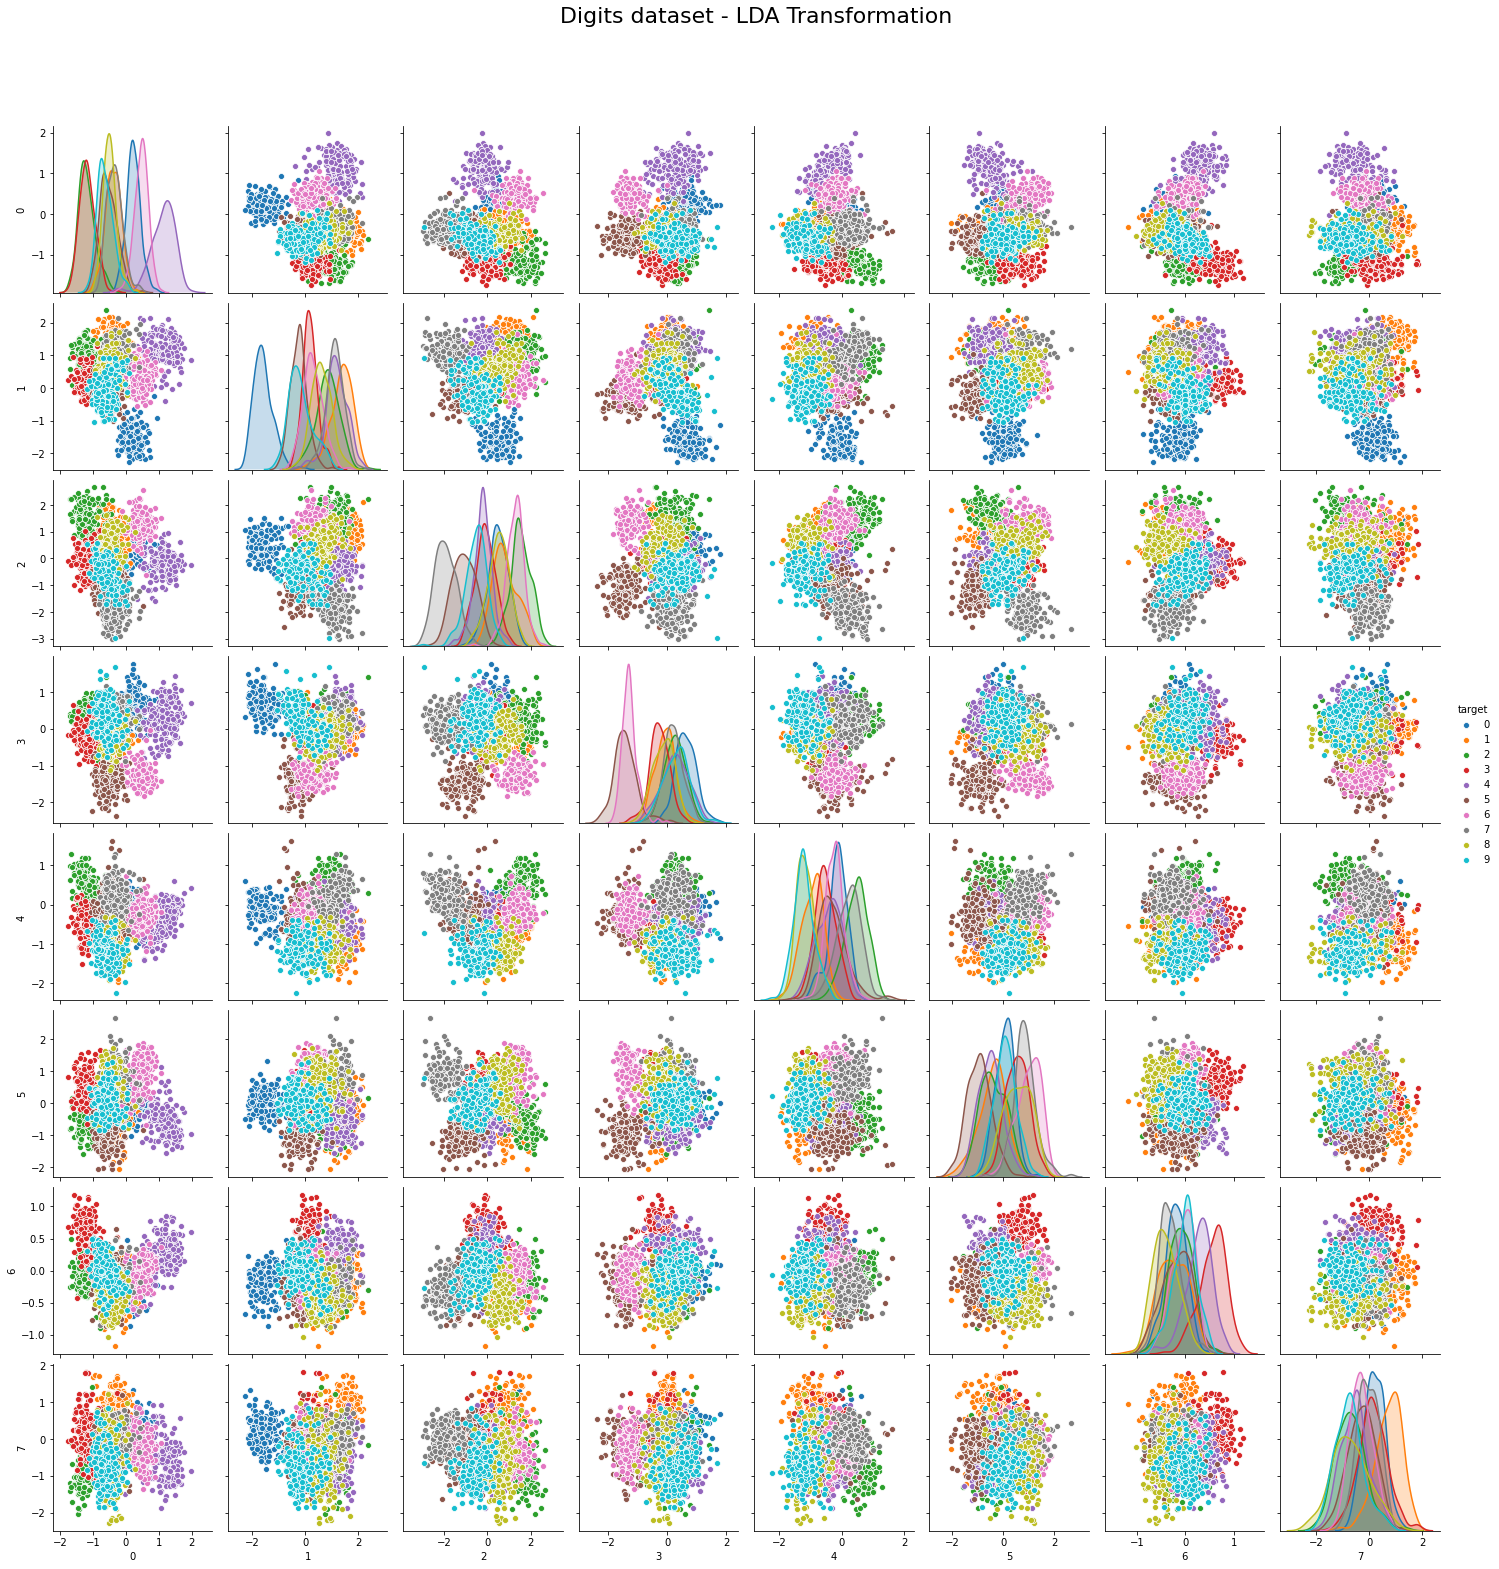

In [7]:
digits_lda = pd.DataFrame.from_records(X_lda[:, :8])
digits_lda['target'] = y
g = sns.pairplot(digits_lda, hue="target")
g.fig.suptitle(f"Digits dataset - LDA Transformation", y=1.08, fontsize=22);

In [8]:
X_lda_inv = lda.inverse_transform(X_lda, verbose=True)

X_lda_inv.shape

(1797, 64)

## Unsupervised LDA Transformation
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying Unsupervised LDA.

In [9]:
ulda = LinearDiscriminantAnalysis(random_state=42)
X_ulda = ulda.fit_transform(X, min_clusters=10, max_clusters=150, verbose=True)

X_ulda.shape

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters between 10 and 150

Optimal number of clusters found: 119

Predicting the classes from the clusters...

Mu:
[[ 0.      0.3038  5.2048 11.8358 11.8481  5.7819  1.3623  0.1297  0.0056
   1.9939 10.3823 11.9794 10.2794  8.1758  1.8464  0.108   0.0028  2.6016
   9.9032  6.9928  7.0979  7.8063  1.7885  0.0501  0.0011  2.4697  9.0913
   8.8214  9.9271  7.5515  2.3178  0.0022  0.      2.3395  7.6672  9.0718
  10.3016  8.744   2.9093  0.      0.0089  1.5838  6.8815  7.2282  7.6722
   8.2365  3.4563  0.0273  0.0072  0.7045  7.507   9.5392  9.4162  8.7585
   3.7251  0.2065  0.0006  0.2794  5.5576 12.089  11.8091  6.7641  2.0679
   0.3645]]

Mu_c[0]:
[ 0.    0.35  8.1  14.3  11.05  1.    0.    0.    0.    5.25 15.1  10.7
 14.35  3.4   0.    0.    0.    3.45  8.35  7.3  14.4   1.6   0.    0.
  0.    0.25  3.9  13.4  15.4   5.9   0.05  0.    0.    0.    1.55  5.5
 10.   15.2   3.15  0.    0.    1.    

Mu_c[80]:
[ 0.     0.     0.25   6.875 14.     8.25   0.     0.     0.     0.
  3.375 14.25   6.125 14.75   0.25   0.     0.     0.     5.875 11.875
  5.625 11.875  0.125  0.     0.     0.     2.75  14.5   14.375  5.5
  0.     0.     0.     0.     4.375 15.    15.     3.25   0.     0.
  0.     2.125 14.75   6.375  7.625 10.75   0.625  0.     0.     1.
 11.    10.75   3.125  9.75   7.375  0.     0.     0.     0.75   6.5
 12.125 14.875 13.25   0.25 ]

Mu_c[81]:
[ 0.      0.      1.2308  9.3077 14.     10.7692  1.9231  0.      0.
  0.6154 11.7692 12.9231 10.3077 13.7692  6.2308  0.      0.      4.0769
 14.6923  3.5385  2.6154 11.7692  5.4615  0.      0.      3.4615 13.5385
 10.7692 10.6154 11.8462  0.4615  0.      0.      0.      2.3846  9.8462
 15.8462  9.8462  0.1538  0.      0.      0.      0.      9.3846 11.4615
 14.3077  2.6154  0.      0.      0.      0.4615 12.7692  9.9231 12.9231
  2.4615  0.      0.      0.      0.2308 11.5385 15.      7.9231  0.2308
  0.    ]

Mu_c[82]:
[ 0.    

(1797, 64)

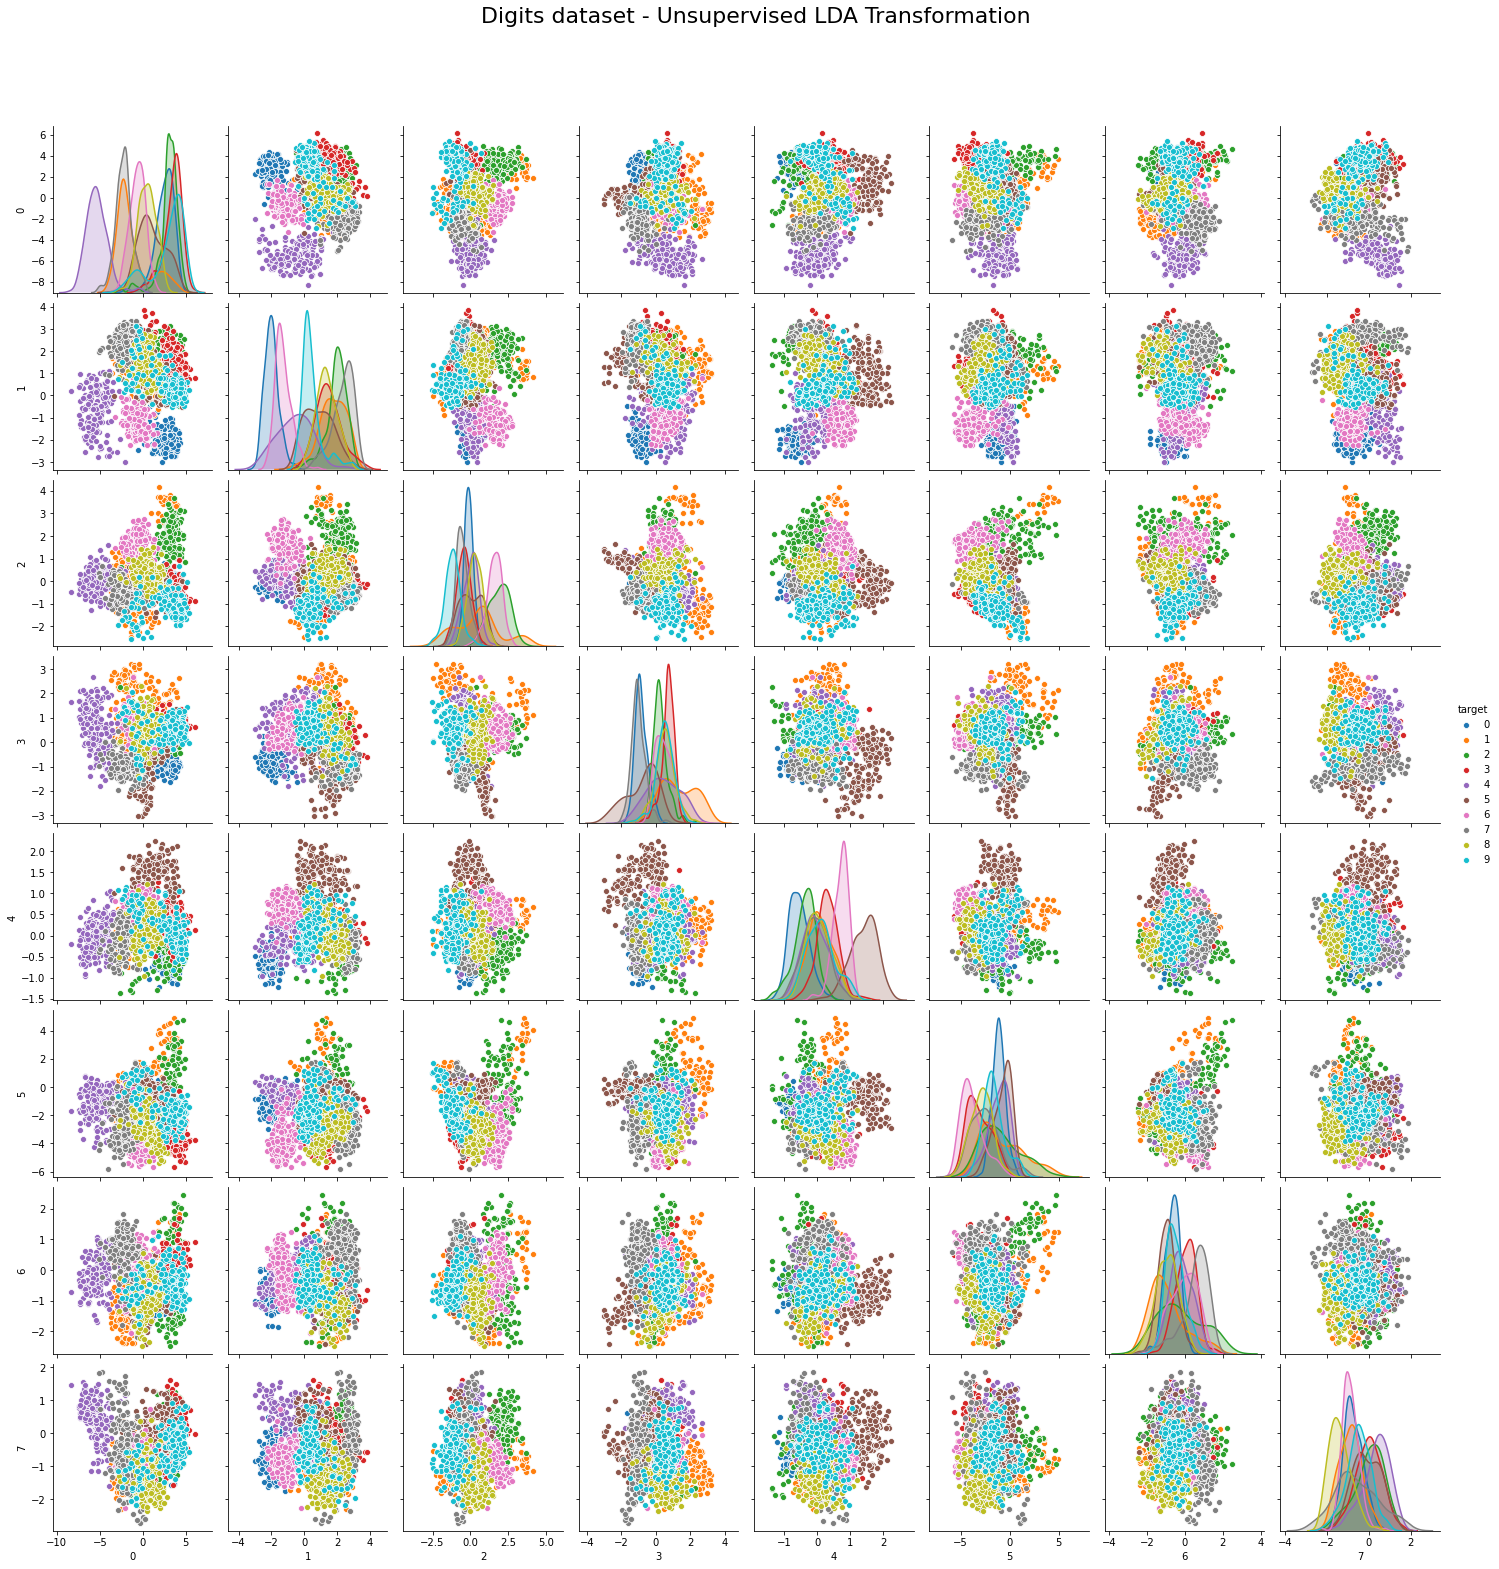

In [10]:
digits_ulda = pd.DataFrame.from_records(X_ulda[:, :8])
digits_ulda['target'] = y
g = sns.pairplot(digits_ulda, hue="target")
g.fig.suptitle(f"Digits dataset - Unsupervised LDA Transformation", y=1.08, fontsize=22);

In [11]:
X_ulda_inv = ulda.inverse_transform(X_ulda, verbose=True)

X_ulda_inv.shape

(1797, 64)

## Comparison

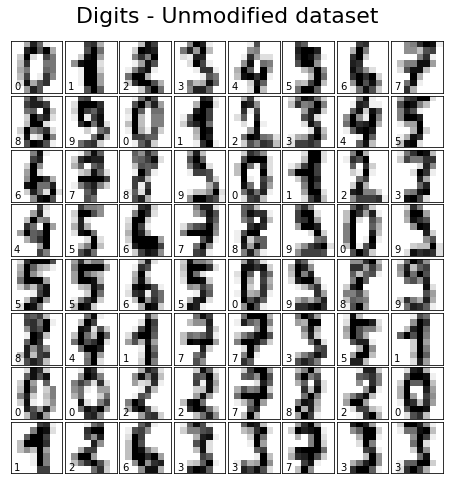

In [12]:
print_digits(X, y, title="Digits - Unmodified dataset")

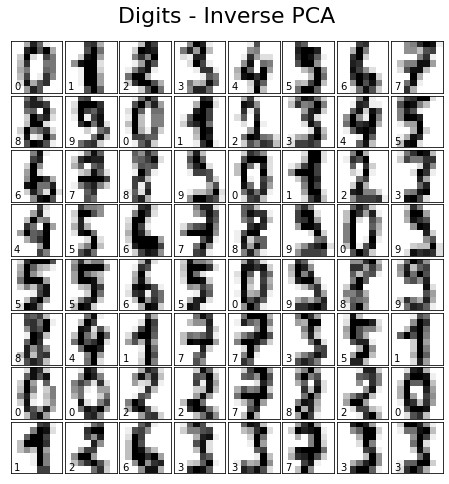

In [13]:
print_digits(X_pca_inv, y, title="Digits - Inverse PCA")

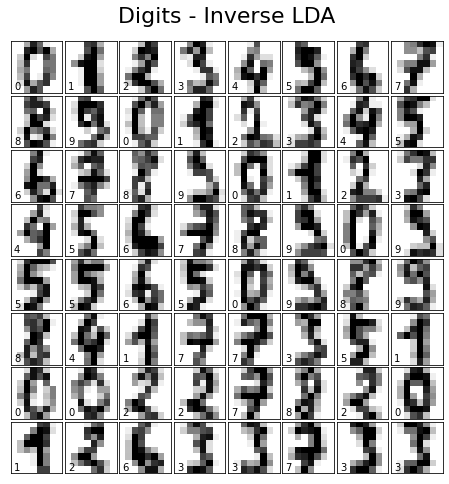

In [14]:
print_digits(X_lda_inv, y, title="Digits - Inverse LDA")

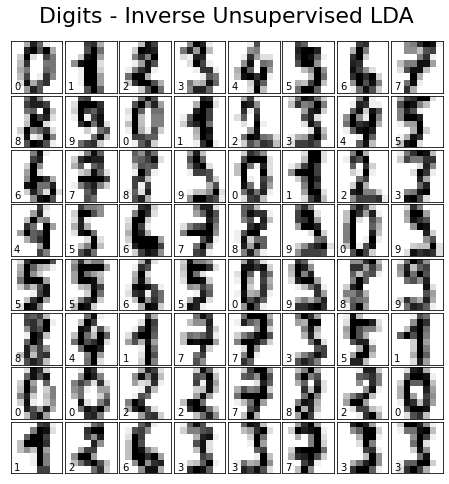

In [15]:
print_digits(X_ulda_inv, y, title="Digits - Inverse Unsupervised LDA")

In [16]:
gnb = GaussianNB()
res_original = np.mean(cross_val_score(gnb, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(gnb, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(gnb, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(gnb, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with Naive Bayes:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with Naive Bayes:
 - Original dataset                   : 80.69%
 - PCA transformation                 : 83.42%
 - LDA transformation                 : 93.32%
 - Unsupervised LDA transformation    : 87.43%



In [17]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=42)
res_original = np.mean(cross_val_score(dtc, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(dtc, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(dtc, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(dtc, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Decision Tree Classifier:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with a Decision Tree Classifier:
 - Original dataset                   : 78.41%
 - PCA transformation                 : 78.63%
 - LDA transformation                 : 84.70%
 - Unsupervised LDA transformation    : 84.87%



In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 64, 64), activation='relu', max_iter=100, alpha=1e-4, solver='sgd', 
                    verbose=False, random_state=42, learning_rate_init=.1)
res_original = np.mean(cross_val_score(mlp, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(mlp, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(mlp, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(mlp, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Multilayer Perceptron Classifier:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with a Decision Tree Classifier:
 - Original dataset                   : 10.07%
 - PCA transformation                 : 93.32%
 - LDA transformation                 : 9.91%
 - Unsupervised LDA transformation    : 94.27%

